# STAT 301: Statistical Modelling for Data Science 


# <font color=red> Confounding Factors
    
## Gabriela Cohen Freue

## Last class ...

- we discuss usual assumptions of LR and how to check them

- we examined the problem of confounding factors through a simulation study

## Today ....

I'll introduce a new case study:

### <font color="blue"> Can we predict protein from mRNA levels?? </font>

We'll use this case study in the next few weeks. Answers to questions will be evaluated through iClickers.

## Case study: relation between mRNA and protein levels

The picture illustrates what is known as the Central Dogma of Biology

<center>
<img src="img/prot_gene.png" width=500>
</center>

Despite expectations of a high correlation between mRNA and protein levels, experimental results have shown very low correlation values.

In 2014, a research group claimed to find a "predictive model", which can be used to predict protein from mRNA!!

> Wilhelm, M. et al. Mass-spectrometry-based draft of the human proteome. Nature 509, 582–587 (2014)

> Paper from my research group: Fortelny N, Overall CM, Pavlidis P, Freue GVC. Can we predict protein from mRNA levels? Nature. 2017 Jul 26;547(7664):E19-E20. doi: 10.1038/nature22293.

We'll use data from this group submitted to the Journal to examine this problem

### Claim

Using the median ratio of protein to mRNA levels per gene as a proxy for translation rates, our data show that [...] ***it now becomes possible to predict protein abundance in any given tissue with good accuracy from the measured mRNA abundance***

<center>
<img src="img/nature_res.png" width=500>
</center>

In the paper, the authors estimated the relation between protein and mRNA levels *per gene*, and used those estimated models to predict protein levels *per gene*.

> it will be important at a later phase of the analysis to note that models are *gene-specific*

**Gene-specific models**: for each gene they estimated the following model (for simplicity we do not use a subscript $g$)  

$$\text{prot}_{t} = \beta_1 \; \times \text{mrna}_{t} + \varepsilon_t$$ 

where $\hat{\beta}_1 = median_t(\text{prot}_{t}/\text{mrna}_{t})$

> prot$_{t}$ and mrna$_{t}$ are the protein and mRNA levels of a gene $g$ in tissue $t$, respectively

**Question 1**

Is this a LR model:

- **A** TRUE

- **B** FALSE

<font color="blue"> **Note that these models do not contain an intercept! and they were not estimated by LS.**</font> 
    
While in general different models and estimation methods can be used to analyze the same data, it is important to evaluate the results according to the assumptions and the methodology used. 
    
> The evaluation and interpretation of the results in the paper were not appropriate
    
*Let's take a look at the data.*

### <font color="blue"> This a simple linear regression!! </font>

... even if the estimated ratio of the $g$-th gene, $\hat{r}_g$, is *not* estimated by LS

**A.** LR with 1 continuous variable (SLR per gene): `lm(protein~mrna, data=dat_G1)`

> models the relation between protein and mRNA separately for each gene 


**B.** LR with 1 categorical and 1 continuous, without interaction (additive): `lm(protein~gene+mrna,dat_3genes)`

> assumes that the relation between mRNA and protein levels is the same for all genes but allows different predictions for different genes

**C.** LR with 1 categorical and 1 continuous, *plus* interactions: `lm(protein~gene * mrna,dat_3genes)`

> we allowed the relation between protein and mRNA to depend on gene

> Wilhelm et al.: "translation rate is a fundamental, encoded (constant) *characteristic of a transcript [gene]*"

In [1]:
library(tidyverse)
library(repr)
library(ggplot2)
library(cowplot)
library(moderndive)
library(broom)

prot_mrna_dat <- read.csv("data/nature_dat.csv", row.names = 1, stringsAsFactors= TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




### A quick glance at the data:

**Question 2**

For how many genes with protein and mRNA values are included in the data?

- **A** 4824 were measured but some have missing values

- **B** 4824 were measured without any missing value

- **C** 12 genes were measured for each sample

- **D** 57,888 genes 

## Subset to examine different questions

We first randomly select 3 genes with complete data (no missing values) to examine some questions related to this problem

In [2]:
set.seed(561)
dat_3genes <- prot_mrna_dat  %>% subset(values.av == 12)  %>% 
         subset(gene %in% sample(gene,3)) 

In [3]:
dat_3genes

,gene,values.av,tissue,prot,mrna
,<fct>,<int>,<fct>,<dbl>,<dbl>
585,ENSG00000085733,12,uterus,1.648298e-06,0.0001278
2751,ENSG00000143553,12,uterus,8.067373e-06,0.0000279
3717,ENSG00000168497,12,uterus,1.537497e-04,0.0000415
5409,ENSG00000085733,12,kidney,1.349573e-05,0.0000673
7575,ENSG00000143553,12,kidney,5.304285e-06,0.0000247
8541,ENSG00000168497,12,kidney,1.917933e-05,0.0000202
10233,ENSG00000085733,12,testis,4.069264e-05,0.0000862
12399,ENSG00000143553,12,testis,2.388999e-05,0.0000220
13365,ENSG00000168497,12,testis,3.222980e-06,0.0000054


**Question 3**

In how many tissues were each gene measured?

- **A** 12 genes per tissue

- **B** 12 tissues per genes

- **C** 3 tissues per gene

- **D** 36 tissues per gene

## SLR: can we predict protein from mRNA (separately for each gene)? 

**Question 4**

The authors emphasized the importance of estimating *gene-specific* models to predict protein levels from mRNA levels. Which model do you think would be appropriate to address this question??

- **A** `dat_3genes %>% lm(prot ~ mrna, data = .) %>% tidy()`

- **B** `dat_3genes %>% group_by(gene) %>% do(model=tidy(lm(prot ~ mrna, data = .))) %>% pull()`

- **C** `dat_3genes %>% lm(prot ~ mrna + gene, data = .) %>% tidy()`

**Question 5**

The following 2 codes can be used to estimate gene-specific models for the 3 selected genes. Which of the following statement is FALSE??

`dat_3genes %>% group_by(gene) %>% do(model=tidy(lm(prot ~ mrna, data = .))) %>% pull()`

vs

`dat_3genes %>% lm(prot ~ mrna * gene, data = .) %>% tidy()`


- **A** both codes give us equivalent information, just different output format

- **B** both codes give us the same estimates for the coefficients of 3 LRs but different SEs

- **C** these models are not appropriate, we need to fit an additive model: `dat_3genes %>% lm(prot ~ mrna + gene, data = .)`

- **D** both codes can be used to predict protein levels using *gene-specific* models


### Visualization

In [7]:
plot_A <- dat_3genes %>% ggplot(aes(mrna,prot, color = gene)) +
    geom_point() + 
    geom_smooth(method = lm, se = FALSE, linewidth = 1.5,fullrange=TRUE)

plot_B <- dat_3genes %>% ggplot(aes(mrna,prot, color = gene)) +
    geom_point() + 
    geom_parallel_slopes(fullrange=TRUE, se= FALSE, linewidth = 1.5)

plot_all <- plot_grid(
  plot_A + theme(legend.position="none"),
  plot_B  + theme(legend.position="none"),
  align = 'vh',
  labels = c("A", "B"),
  vjust = -1,
  nrow = 1
)

# extract a legend 
legend_all <- get_legend(plot_A + 
    guides(color = guide_legend(nrow = 1)) +
    theme(legend.position = "bottom")
)

plot_all <- plot_grid(plot_all, legend_all, ncol = 1, rel_heights = c(1, .1))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


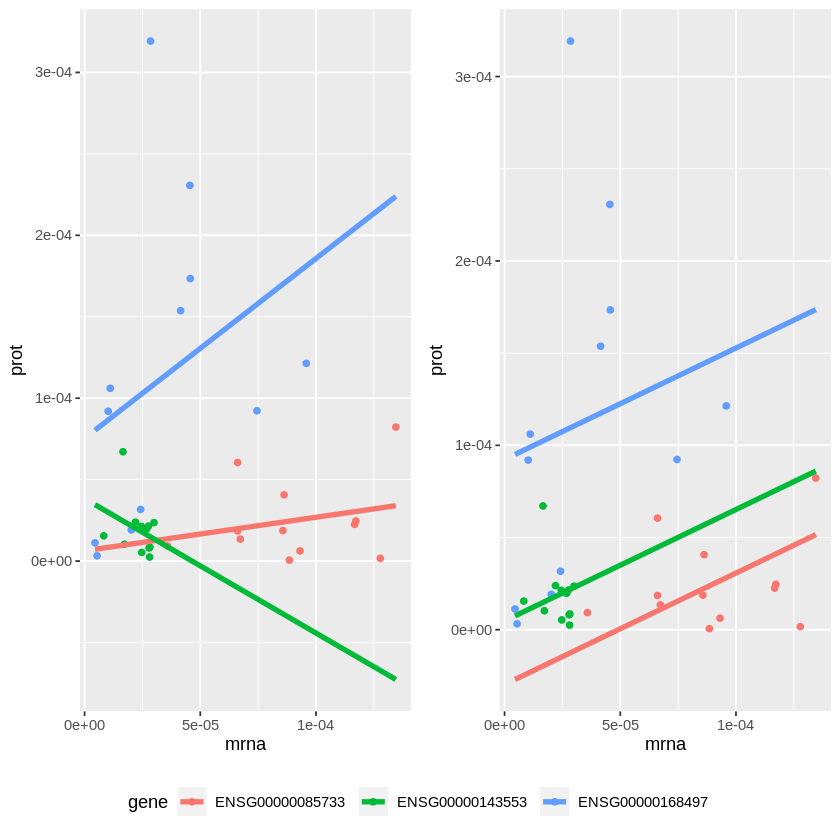

In [6]:
plot_all

**Question 6**

Plot A corresponds to a model with interaction terms and can be estimated with the following code: 

`dat_3genes %>% lm(prot ~ mrna * gene, data = .) %>% tidy()`

This model can be used to answer the authors' question because:

- **A** it estimates the change in protein level per unit change in mRNA level, separately per each gene

- **B** it estimates the change in protein level per unit change in mRNA level, holding everything else constant

- **C** it estimates the change in protein level per unit change in mRNA level, on average for all genes

**Question 7**

Plot B corresponds to an additive model and can be estimated with the following code: 

`dat_3genes %>% lm(prot ~ mrna + gene, data = .) %>% tidy()`

- **A** TRUE

- **B** FALSE

**Question 8**

Which of the following statements is correct??

- **A** The model in plot A was fitted using 3 dummy variables, one per gene

- **B** The model in plot A was fitted using 2 dummy variables

- **C** The model in plot A was fitted using more dummy variables than that in plot B because the slopes are different

- **D** I have no idea what dummy variable is!!